In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_excel('Survey_data.xlsx')

In [16]:
data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,LessNegative,PositiveSupport,SructuredComm,Pre-Career (you are studying and not yet begun a full-time career),Early-Career (1-4 years of experience),Mid-Career (5-9 years of experience),Later-Career (20+ years of experience),Advanced Career (10-20 years of experience),Other,Retired
0,2021-10-18 18:26:40,2021-10-18 18:27:19,IP Address,81.47.233.8,100,39,True,2021-10-18 18:27:20.158,R_T5BANO8ZiayOaJj,NaN,...,0,0,0,1,0,0,0,0,0,0
1,2021-10-18 20:11:35,2021-10-18 20:13:36,IP Address,78.30.11.93,100,121,True,2021-10-18 20:13:36.661,R_W3vJIx0sL2XgeeB,NaN,...,0,0,0,0,1,0,0,0,0,0
2,2021-10-18 20:10:53,2021-10-18 20:16:03,IP Address,95.127.161.97,100,310,True,2021-10-18 20:16:04.527,R_2ByromYPs3VVANe,NaN,...,0,1,1,0,1,0,0,0,0,0
3,2021-10-18 20:17:07,2021-10-18 20:20:48,IP Address,188.26.223.4,100,220,True,2021-10-18 20:20:48.438,R_D77A3LdncGInZOp,NaN,...,1,1,0,0,0,1,0,0,0,0
4,2021-10-18 20:17:42,2021-10-18 20:22:17,IP Address,81.0.43.136,100,275,True,2021-10-18 20:22:17.484,R_2PhRvXXmFTkD4Ve,NaN,...,1,0,0,0,1,0,0,0,0,0


In [17]:
data.shape

(1806, 53)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 53 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   StartDate                                                           1806 non-null   datetime64[ns]
 1   EndDate                                                             1806 non-null   datetime64[ns]
 2   Status                                                              1806 non-null   object        
 3   IPAddress                                                           1806 non-null   object        
 4   Progress                                                            1806 non-null   int64         
 5   Duration (in seconds)                                               1806 non-null   int64         
 6   Finished                                                

In [19]:
print(data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Broad Behavior',
       'Specific Behavior', 'Career Stage', 'Gender', 'Country', 'Source',
       'Q_Language', 'Listening', 'Micromanaging', 'ClosedMinded',
       'ProactiveEngagement', 'Bulldozing', 'MoreFirm', 'ImpatienceTeams',
       'StayingMotivated', 'GivingCredit', 'ControlledConflict',
       'People-Results', 'Judging', 'EmotionalRegulation', 'Procrastination',
       'TaskPrioritization', 'ResistDistractions', 'DoingOthersWork',
       'LetGoArguments', 'ReasonedDecisions', 'LessNegative',
       'PositiveSupport', 'SructuredComm',
       'Pre-Career (you are studying and not yet begun a full-time career)',
       'Early-Career (1-4 years of experience)'

In [20]:
data=data.drop(columns=['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel','Source',
       'Q_Language'])

In [22]:
data.head()

,UserLanguage,Broad Behavior,Specific Behavior,Career Stage,Gender,Country,Listening,Micromanaging,ClosedMinded,ProactiveEngagement,...,LessNegative,PositiveSupport,SructuredComm,Pre-Career (you are studying and not yet begun a full-time career),Early-Career (1-4 years of experience),Mid-Career (5-9 years of experience),Later-Career (20+ years of experience),Advanced Career (10-20 years of experience),Other,Retired
0,ES-ES,"ProactiveEngagement,ReasonedDecisions",Taking a bit more time to think and make more ...,Pre-Career (you are studying and not yet begun...,Prefer not to share this,Spain,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,ES-ES,DoingOthersWork,"Not being firm with others when I should, for ...",Early-Career (1-4 years of experience),Woman,Spain,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,ES-ES,"Listening,Micromanaging,ClosedMinded,Proactive...","Not micromanaging, learning to let go of contr...",Early-Career (1-4 years of experience),Woman,Spain,1,1,1,1,...,0,1,1,0,1,0,0,0,0,0
3,ES-ES,"Listening,Micromanaging,ClosedMinded,Impatienc...",Not leaving tasks for the last minute (not pro...,Mid-Career (5-9 years of experience),Woman,Spain,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
4,ES-ES,"Micromanaging,MoreFirm,StayingMotivated,Contro...",Better controlling my emotions in difficult or...,Early-Career (1-4 years of experience),Woman,Spain,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [30]:
data['Career Stage'].value_counts()

Later-Career (20+ years of experience)                                774
Advanced Career (10-20 years of experience)                           558
Mid-Career (5-9 years of experience)                                  187
Early-Career (1-4 years of experience)                                 74
Retired                                                                50
Pre-Career (you are studying and not yet begun a full-time career)     45
Other                                                                  28
Name: Career Stage, dtype: int64

In [142]:
data['Gender'].value_counts()

Woman                       1170
Man                          524
Prefer not to share this      21
Other                          5
Non-Binary                     4
Name: Gender, dtype: int64

In [143]:
data['Country'].value_counts()

Spain                 737
Mexico                392
Ecuador               115
Argentina             110
Peru                  102
Colombia               92
Chile                  61
Venezuela              60
Uruguay                24
Brazil                 22
Costa Rica             14
Guatemala              10
Panama                  9
Nicaragua               8
Portugal                6
United States           6
Dominican Republic      5
United Kingdom          4
Bolivia                 3
Italy                   3
Switzerland             2
Andorra                 2
El Salvador             2
Paraguay                2
Belgium                 2
Germany                 2
Thailand                2
Luxembourg              1
Honduras                1
Lithuania               1
Nigeria                 1
Canada                  1
Australia               1
Greece                  1
Singapore               1
India                   1
Name: Country, dtype: int64

In [26]:
Broaddf = data['Broad Behavior'].str.split(',',expand=True)
Broaddf.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,ProactiveEngagement,ReasonedDecisions,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,DoingOthersWork,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Listening,Micromanaging,ClosedMinded,ProactiveEngagement,StayingMotivated,GivingCredit,ControlledConflict,People-Results,EmotionalRegulation,Procrastination,...,PositiveSupport,SructuredComm,None,None,None,None,None,None,None,None
3,Listening,Micromanaging,ClosedMinded,ImpatienceTeams,Judging,EmotionalRegulation,Procrastination,ResistDistractions,LetGoArguments,ReasonedDecisions,...,None,None,None,None,None,None,None,None,None,None
4,Micromanaging,MoreFirm,StayingMotivated,ControlledConflict,Judging,EmotionalRegulation,Procrastination,ReasonedDecisions,LessNegative,None,...,None,None,None,None,None,None,None,None,None,None


In [27]:
Broadstack = Broaddf.stack().value_counts() / len(data)


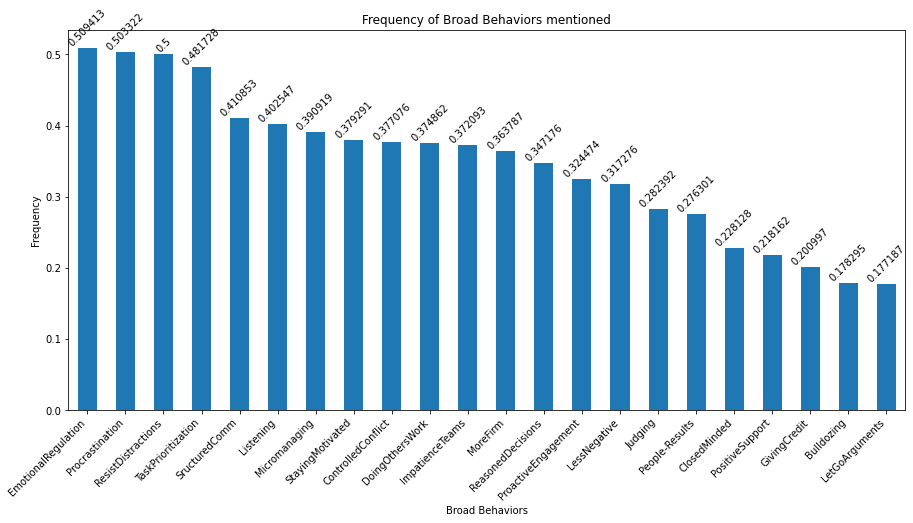

In [28]:
ax = Broadstack.plot(kind='bar', figsize=(15,7), title = "Frequency of Broad Behaviors mentioned" , xlabel = "Broad Behaviors", ylabel = "Frequency")

ax.bar_label(ax.containers[0],label_type='edge',rotation = 45)

ax.set_xticklabels(labels = Broadstack.index,rotation = 45,ha='right')
plt.show()

In [57]:
##Broad Categories by various groups

broad_cats=data.iloc[:,6:28]
broad_cats['Career Stage'] = data['Career Stage']
broad_cats['Country'] = data['Country']
broad_cats['Gender'] = data['Gender']

In [58]:
print(broad_cats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Listening            1806 non-null   int64 
 1   Micromanaging        1806 non-null   int64 
 2   ClosedMinded         1806 non-null   int64 
 3   ProactiveEngagement  1806 non-null   int64 
 4   Bulldozing           1806 non-null   int64 
 5   MoreFirm             1806 non-null   int64 
 6   ImpatienceTeams      1806 non-null   int64 
 7   StayingMotivated     1806 non-null   int64 
 8   GivingCredit         1806 non-null   int64 
 9   ControlledConflict   1806 non-null   int64 
 10  People-Results       1806 non-null   int64 
 11  Judging              1806 non-null   int64 
 12  EmotionalRegulation  1806 non-null   int64 
 13  Procrastination      1806 non-null   int64 
 14  TaskPrioritization   1806 non-null   int64 
 15  ResistDistractions   1806 non-null   int64 
 16  DoingO

In [42]:
##By Career Stage

Broad_cats_grouped = broad_cats.groupby('Career Stage').agg('sum')

Broad_cats_grouped

,Listening,Micromanaging,ClosedMinded,ProactiveEngagement,Bulldozing,MoreFirm,ImpatienceTeams,StayingMotivated,GivingCredit,ControlledConflict,...,EmotionalRegulation,Procrastination,TaskPrioritization,ResistDistractions,DoingOthersWork,LetGoArguments,ReasonedDecisions,LessNegative,PositiveSupport,SructuredComm
Career Stage,,,,,,,,,,,,,,,,,,,,,
Advanced Career (10-20 years of experience),219,208,120,197,82,208,206,217,113,210,...,286,281,269,289,203,80,180,177,100,231
Early-Career (1-4 years of experience),20,35,19,31,8,31,19,29,15,21,...,40,42,33,45,28,11,26,30,20,34
Later-Career (20+ years of experience),327,301,164,214,172,269,297,283,141,291,...,387,368,358,359,293,138,271,222,172,294
Mid-Career (5-9 years of experience),67,74,38,61,23,69,70,76,29,69,...,94,109,100,102,73,40,62,69,35,81
Other,8,9,6,7,4,9,9,9,4,7,...,14,11,15,11,13,4,8,6,5,13
Pre-Career (you are studying and not yet begun a full-time career),21,23,13,21,8,16,15,19,11,23,...,24,34,31,33,16,10,23,18,12,23
Retired,27,19,22,22,9,15,19,11,20,29,...,26,21,22,21,17,11,21,17,18,23


In [63]:
def plot_counts_by_careerstage(groupby_count_obj, career_stage, ax=None):
    
    sort_order = groupby_count_obj.loc[career_stage].sort_index().index

    sns.barplot(y = groupby_count_obj.loc[career_stage].index, 
                x = groupby_count_obj.loc[career_stage].values, 
                order = sort_order, 
                palette = 'rocket', edgecolor = 'black', 
                ax = ax
                ).set_title(format(career_stage))

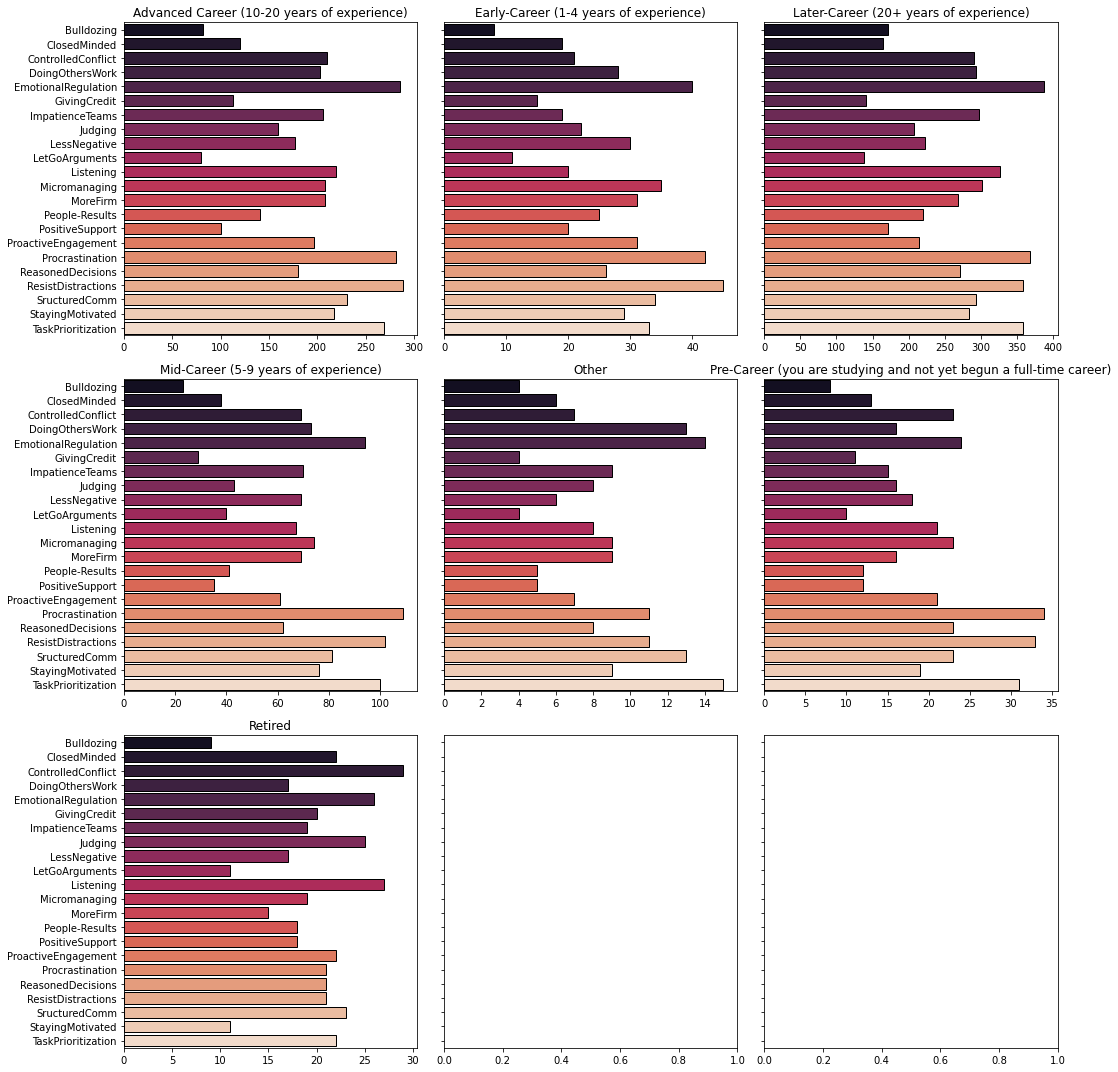

In [64]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharey=True)

for subplot, career_stage in zip(ax.flatten(), list(Broad_cats_grouped.index)):
    plot_counts_by_careerstage(Broad_cats_grouped, career_stage, ax=subplot)
    
plt.tight_layout()

In [65]:
##By Gender

Broad_cats_grouped_gen = broad_cats.groupby('Gender').agg('sum')

Broad_cats_grouped_gen

,Listening,Micromanaging,ClosedMinded,ProactiveEngagement,Bulldozing,MoreFirm,ImpatienceTeams,StayingMotivated,GivingCredit,ControlledConflict,...,EmotionalRegulation,Procrastination,TaskPrioritization,ResistDistractions,DoingOthersWork,LetGoArguments,ReasonedDecisions,LessNegative,PositiveSupport,SructuredComm
Gender,,,,,,,,,,,,,,,,,,,,,
Man,212,188,151,155,110,180,200,209,134,212,...,250,261,235,282,182,97,182,160,149,211
Non-Binary,1,2,1,2,1,0,2,1,1,3,...,2,2,2,4,1,0,3,2,2,3
Other,4,3,2,2,0,2,3,3,2,2,...,3,3,2,3,0,3,2,3,2,2
Prefer not to share this,8,10,7,6,4,3,9,5,1,7,...,12,6,5,7,6,4,9,9,3,7
Woman,465,475,222,392,193,435,427,430,198,428,...,609,598,591,570,458,193,397,369,209,482


In [66]:
def plot_counts_by_Gender(groupby_count_obj, gender, ax=None):
    
    sort_order = groupby_count_obj.loc[gender].sort_index().index

    sns.barplot(y = groupby_count_obj.loc[gender].index, 
                x = groupby_count_obj.loc[gender].values, 
                order = sort_order, 
                palette = 'rocket', edgecolor = 'black', 
                ax = ax
                ).set_title(format(gender))

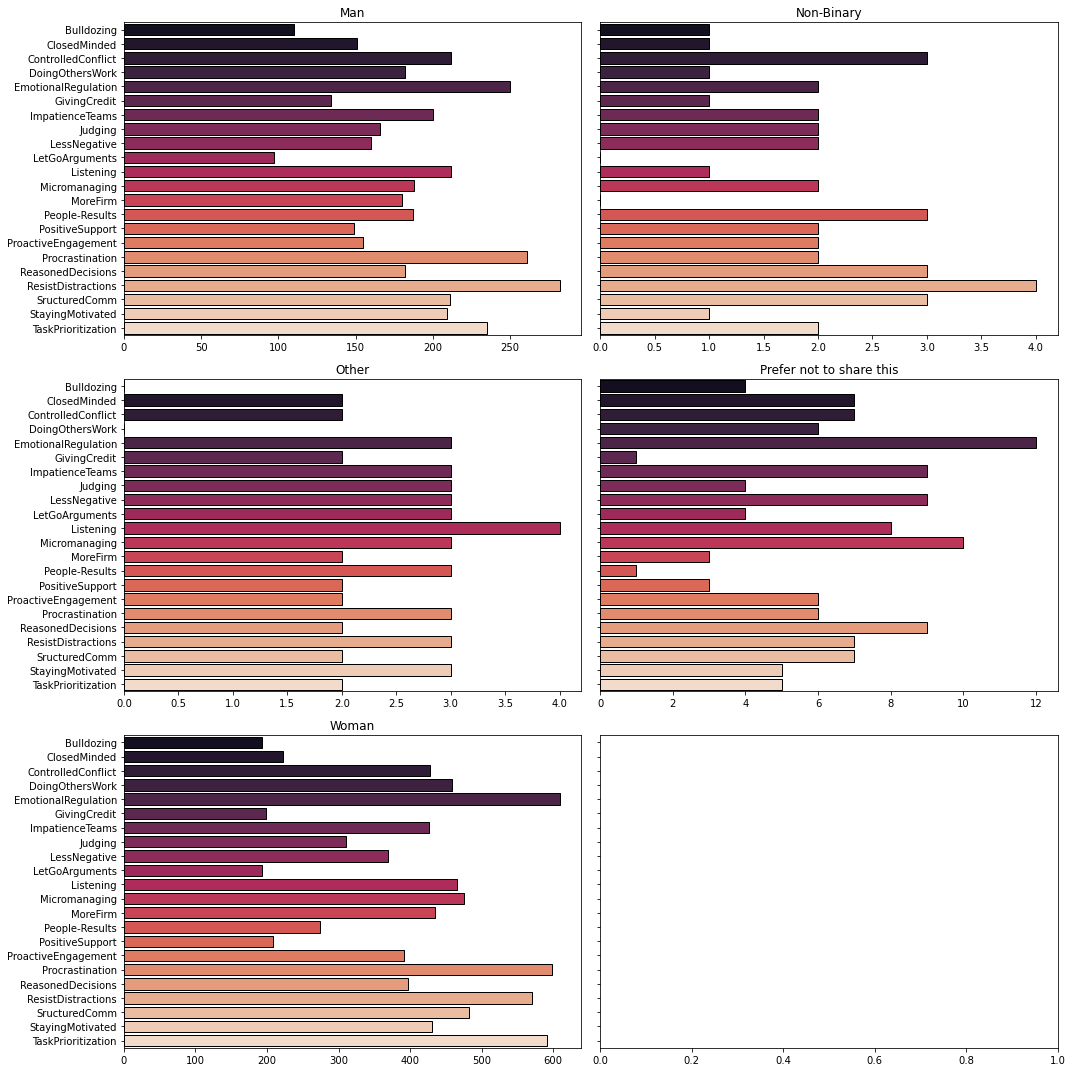

In [69]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15), sharey=True)

for subplot, gender in zip(ax.flatten(), list(Broad_cats_grouped_gen.index)):
    plot_counts_by_Gender(Broad_cats_grouped_gen, gender, ax=subplot)
    
plt.tight_layout()

In [135]:
##By Country


Broad_cats_grouped_coun = broad_cats.groupby('Country').agg('sum')


Broad_cats_grouped_coun['sum'] = Broad_cats_grouped_coun.sum(axis=1,skipna=True)

Broad_cats_grouped_coun=Broad_cats_grouped_coun.sort_values(by='sum',ascending=False)
Broad_cats_grouped_coun = Broad_cats_grouped_coun.drop(columns=['sum'])
Broad_cats_grouped_coun.head()

,Listening,Micromanaging,ClosedMinded,ProactiveEngagement,Bulldozing,MoreFirm,ImpatienceTeams,StayingMotivated,GivingCredit,ControlledConflict,...,EmotionalRegulation,Procrastination,TaskPrioritization,ResistDistractions,DoingOthersWork,LetGoArguments,ReasonedDecisions,LessNegative,PositiveSupport,SructuredComm
Country,,,,,,,,,,,,,,,,,,,,,
Spain,259,256,131,206,122,248,249,240,118,269,...,360,335,336,356,290,122,218,230,104,275
Mexico,187,173,107,136,68,168,153,179,84,153,...,207,212,206,196,144,72,163,113,104,183
Ecuador,52,44,45,50,28,50,47,53,34,51,...,64,60,52,59,44,34,56,50,47,53
Peru,34,40,28,46,19,34,37,42,34,50,...,59,58,51,52,31,17,38,32,33,46
Colombia,42,44,27,28,23,30,41,35,20,30,...,45,50,42,44,39,14,36,33,23,38


In [136]:
def plot_counts_by_country(groupby_count_obj, country, ax=None):
    
    sort_order = groupby_count_obj.loc[country].sort_index().index

    sns.barplot(y = groupby_count_obj.loc[country].index, 
                x = groupby_count_obj.loc[country].values, 
                order = sort_order, 
                palette = 'rocket', edgecolor = 'black', 
                ax = ax
                ).set_title(format(country))

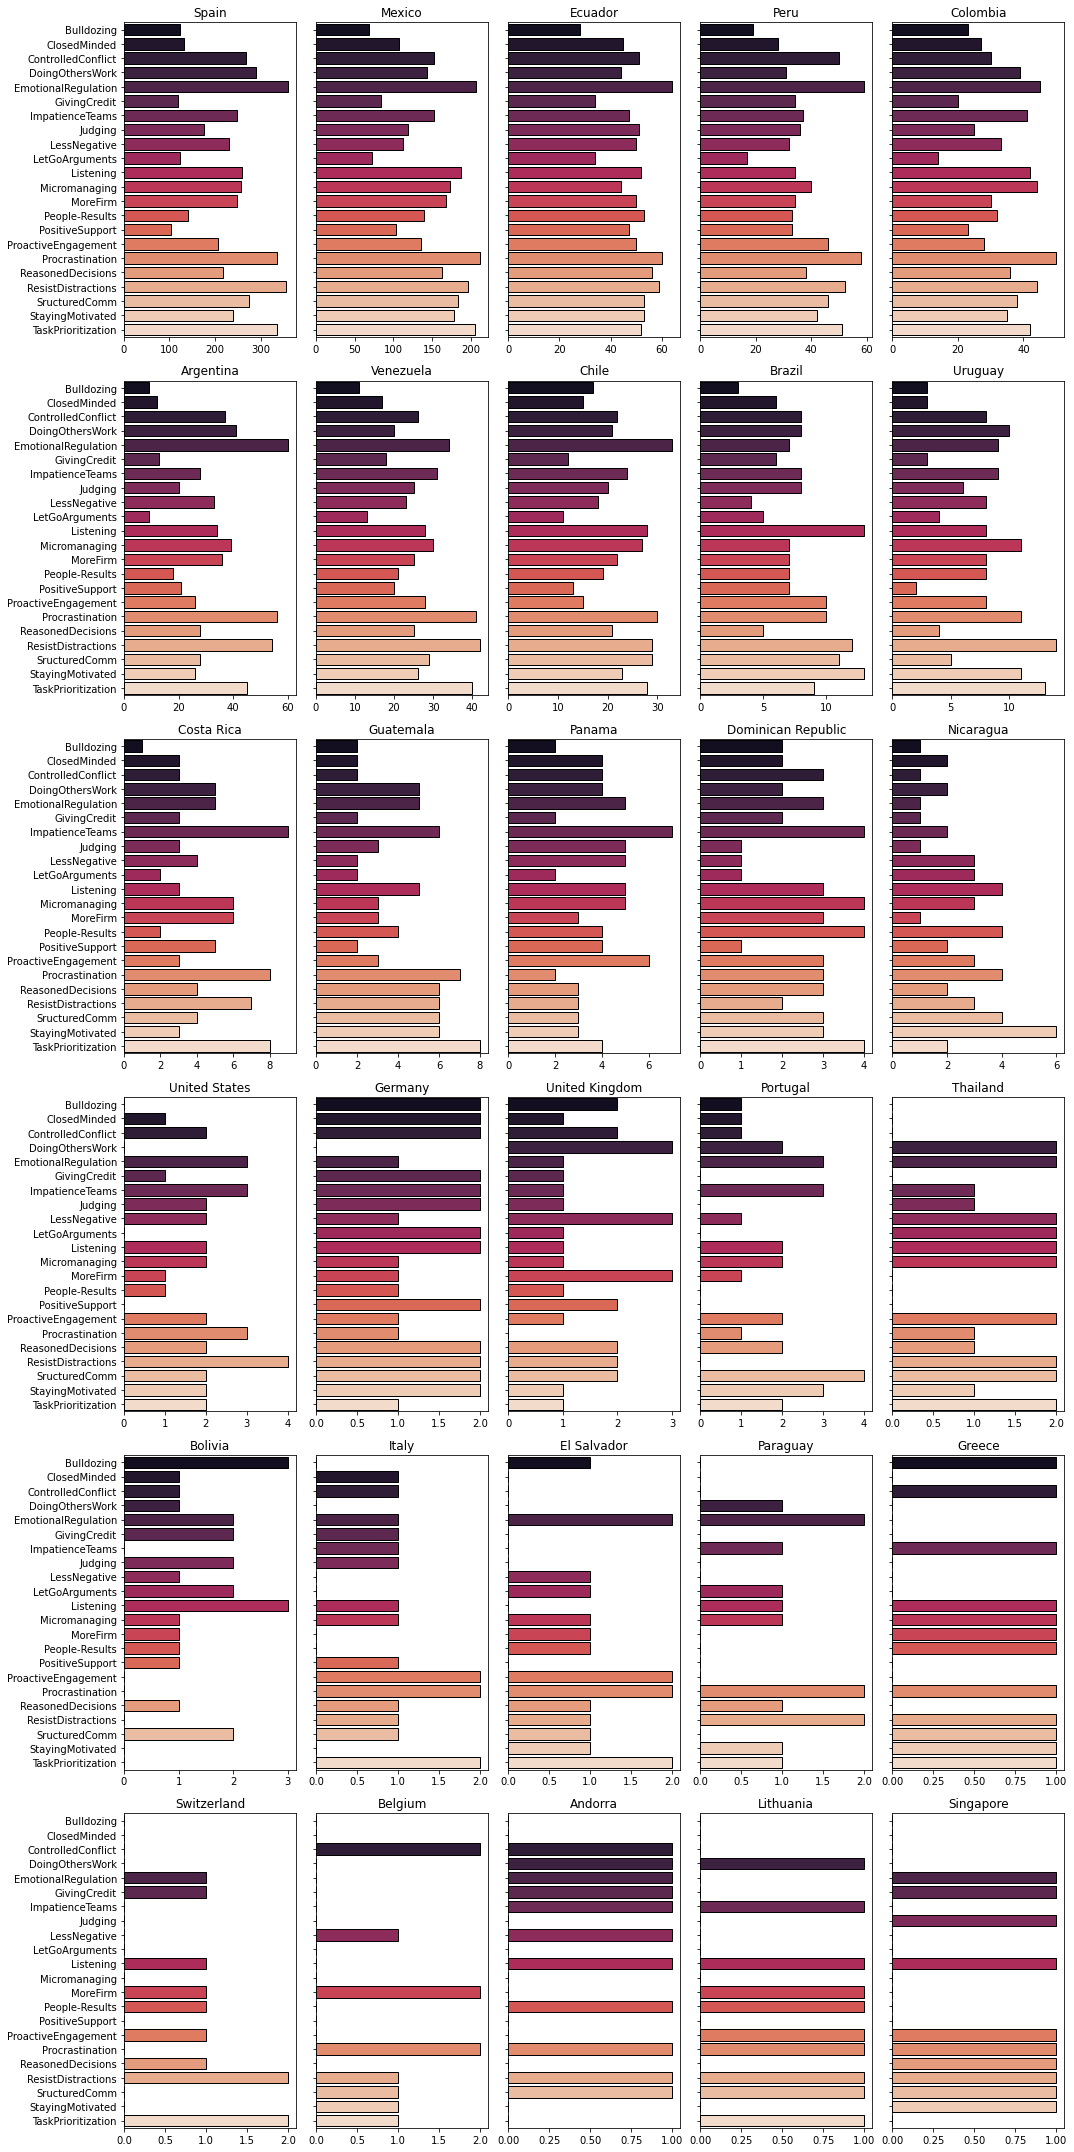

In [141]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(15,30), sharey=True)

for subplot, country in zip(ax.flatten(), list(Broad_cats_grouped_coun.index)):
    plot_counts_by_country(Broad_cats_grouped_coun, country, ax=subplot)
    
plt.tight_layout()